In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import csv
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [19]:
data=pd.read_excel('dataset.xls') 
df = pd.DataFrame(data)

In [22]:
#Preprocessing
#Replacing missing values and Nan with 0 
df=df.replace(to_replace ="..", value =0) 
df=df.replace(to_replace =np.nan, value =0) 
#Grouping by country
groups=df.groupby('Country name')

In [23]:
#Carbon footprint = (CO2 emissions in total + methane emissions + N2O )/population per country.
names={}#Dictionary to store carbon footprint for each country
for name,group in groups:
    for year in range(1990,2009):
        co2=group[group["Series name"]=="CO2 emissions, total (KtCO2)"][year].values[0]
        ch4=group[group["Series name"]=="Methane (CH4) emissions, total (KtCO2e)"][year].values[0]
        n2o=group[group["Series name"]=="Nitrous oxide (N2O) emissions, total (KtCO2e)"][year].values[0]
        population=group[group["Series name"]=="Population"][year].values[0]
        names.setdefault(name,[])
        names[name].append(np.nan_to_num(np.divide((co2+ch4+n2o),population)))

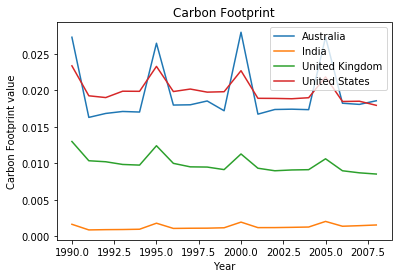

In [24]:
#Plotting carbon footprint
countries=["Australia","India","United Kingdom","United States"]
for k,v in names.items():
    if k in countries:
        plt.plot(list(range(1990,2009)),v, label = k)    
plt.xlabel('Year') 
plt.ylabel('Carbon Footprint value') 
plt.title('Carbon Footprint') 
plt.legend() 
plt.show() 

In [25]:
#Mapping Country Code to each group
with open('CountryCode.csv') as f:
    reader = csv.reader(f)
    c_code = dict(reader)
f.close()
for key,val in names.items():
    names[key].append(c_code[key])
    names[key].append(key)
colnames = []
for i in range(1990,2009):
    colnames.append(i)
colnames.append('Country Code')
colnames.append('Country Name')
mapping = pd.DataFrame.from_dict(names,orient='index',columns=colnames)

In [31]:
#Visualizing the Carbon Footprint values on world map
fig = go.Figure(data=go.Choropleth(
    locations = mapping['Country Code'],
    z = mapping[1990],
    text = mapping['Country Name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Carbon Footprint per capita',
))
fig.update_layout(
    title_text='Carbon Footprint in 1990',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='World Bank Data',
        showarrow = False
    )]
)

fig.show()


In [30]:
fig = go.Figure(data=go.Choropleth(
    locations = mapping['Country Code'],
    z = mapping[2008],
    text = mapping['Country Name'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Carbon Footprint per capita',
))
fig.update_layout(
    title_text='Carbon Footprint in 2008',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='World Bank Data',
        showarrow = False
    )]
)

fig.show()
